In [26]:
%run ../Data-Preprocessing.ipynb
%run ../U-Net.ipynb
%run ../Train-Eval-Utils.ipynb

import torchvision.transforms as transforms

from torch.utils.data import DataLoader, ConcatDataset

The Task06_Lung dataset is one of the datasets used for the [Medical Segmentation Decathlon](http://medicaldecathlon.com/) and can be downloaded from [here](https://drive.google.com/file/d/1I1LR7XjyEZ-VBQ-Xruh31V7xExMjlVvi/view?usp=sharing).

Just as was done with the liver tumor dataset, the provided set is split into a train, validation and test subset. However, due to even fewer available CT scans, the validation and test splits are 10% each, with the remaining 80% of CT scans used for training.

Another problem with the dataset is the extreme class imbalance. The majority of CT scan slices are negative - they do not contain any tumor traces, and the slices that do usually contain fairly small tumors with regards to the entire slice. For this reason, the downsampling rate for negative slices is set to 5 - on average, every fifth negative slice will be kept in the training dataset. All of the positive slices are kept. Of course, no downsampling is done on the validation and test sets.

In [ ]:
convert_ct_dataset_to_slices('Task06_Lung', 'Lung_Train', 'Lung_Val', 'Lung_Test', val_split=0.1, test_split=0.1, negative_downsampling_rate=5)

The transformations and loader parameters are exactly the same as with the lung dataset. The images are resized to 128x128 (from 512x512), the batch size is set to 32, and the slices are shuffled.

In [15]:
transform = transforms.Compose([
    transforms.Resize((128, 128), antialias=False),
    transforms.ConvertImageDtype(torch.float)
])

train_images = os.path.join('Lung_Train', 'images')
train_labels = os.path.join('Lung_Train', 'labels')

train_dataset = CTDataset(train_images, train_labels, image_transform=transform, label_transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

val_images = os.path.join('Lung_Val', 'images')
val_labels = os.path.join('Lung_Val', 'labels')

val_dataset = CTDataset(val_images, val_labels, image_transform=transform, label_transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

test_images = os.path.join('Lung_Test', 'images')
test_labels = os.path.join('Lung_Test', 'labels')

test_dataset = CTDataset(test_images, test_labels, image_transform=transform, label_transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

Again, we have tested the U-Net architecture with three different depths - 3, 5 and 7. The best one, with regards to the validation set dice loss, is kept and retrained on the combination of the training and validation sets before finally evaluating it on the test set.

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = DiceLoss()

Epoch 1/30 started...
Training loss: 0.9910070183800488
Validation loss: 0.9973200990094079
...........................................
Epoch 2/30 started...
Training loss: 0.9688414199565484
Validation loss: 0.9751374511807053
...........................................
Epoch 3/30 started...
Training loss: 0.8136854893792935
Validation loss: 0.7866369265097158
...........................................
Epoch 4/30 started...
Training loss: 0.4778328261724332
Validation loss: 0.7178525439015141
...........................................
Epoch 5/30 started...
Training loss: 0.38536655660567243
Validation loss: 0.6084324927241714
...........................................
Epoch 6/30 started...
Training loss: 0.34220128427676066
Validation loss: 0.6154231958919101
...........................................
Epoch 7/30 started...
Training loss: 0.30133923621681646
Validation loss: 0.5642883148458269
...........................................
Epoch 8/30 started...
Training loss: 0.331554

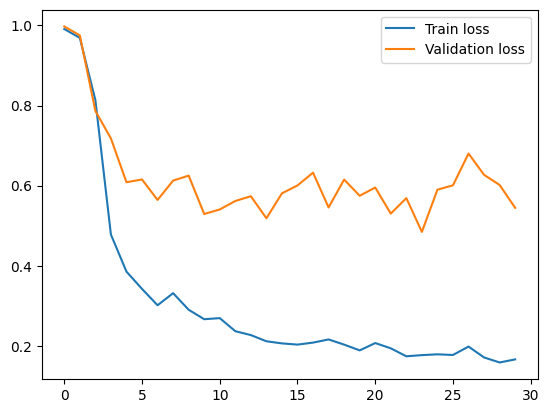

Best loss achieved on the validation set: 0.48453520072831047


In [4]:
model_1 = UNet(depth=3)
model_1.to(device)
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_1, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/30 started...
Training loss: 0.9912119512635518
Validation loss: 0.9968693532325603
...........................................
Epoch 2/30 started...
Training loss: 0.9686576651363838
Validation loss: 0.9862321604181219
...........................................
Epoch 3/30 started...
Training loss: 0.7890633019974561
Validation loss: 0.9122487858489707
...........................................
Epoch 4/30 started...
Training loss: 0.478200832033545
Validation loss: 0.936263628579952
...........................................
Epoch 5/30 started...
Training loss: 0.4094315408691158
Validation loss: 0.9262410490601151
...........................................
Epoch 6/30 started...
Training loss: 0.3622539983532293
Validation loss: 0.7734464351777677
...........................................
Epoch 7/30 started...
Training loss: 0.33970397274668623
Validation loss: 0.8768850664297739
...........................................
Epoch 8/30 started...
Training loss: 0.2570667010

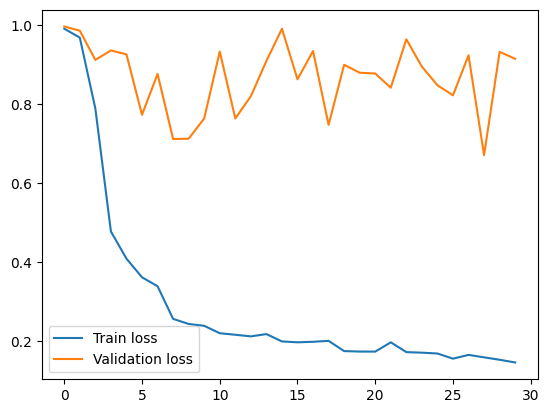

Best loss achieved on the validation set: 0.6715839847370431


In [5]:
model_2 = UNet(depth=5)
model_2.to(device)
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_2, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/30 started...
Training loss: 0.9914891327299723
Validation loss: 0.9930033805193724
...........................................
Epoch 2/30 started...
Training loss: 0.9744281623421646
Validation loss: 0.9331400537932361
...........................................
Epoch 3/30 started...
Training loss: 0.8928966313842835
Validation loss: 0.9945647760673806
...........................................
Epoch 4/30 started...
Training loss: 0.5961537680974821
Validation loss: 0.9178483132962827
...........................................
Epoch 5/30 started...
Training loss: 0.49249557750981027
Validation loss: 0.6509601087481888
...........................................
Epoch 6/30 started...
Training loss: 0.3784053975004491
Validation loss: 0.5660889093522672
...........................................
Epoch 7/30 started...
Training loss: 0.3261497466544795
Validation loss: 0.592655082543691
...........................................
Epoch 8/30 started...
Training loss: 0.261204959

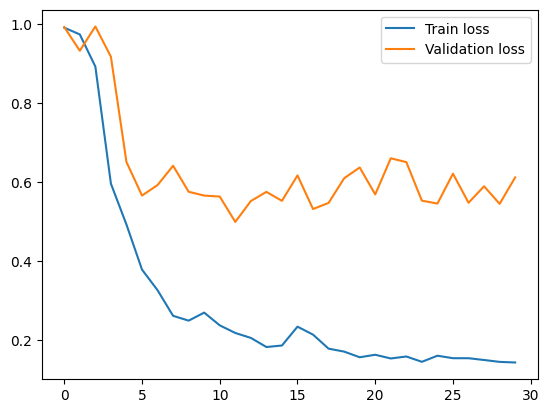

Best loss achieved on the validation set: 0.4992645736093874


In [6]:
model_3 = UNet(depth=7)
model_3.to(device)
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_3, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Based on the plotted loss curves, the best performing model is the depth 3 U-Net model. However, it performs poorly on the validation set, with the best dice loss of around 0.5. The training loss achieves satisfactory values of around 0.14 to 0.15. Due to the poor performance on the validation set, we attempted decreasing the learning rate from 0.001 to 0.0005 and doubling the number of training epochs, but the validation set performance is still poor - even slightly worse than with the initial learning rate.

Epoch 1/60 started...
Training loss: 0.9932767433848807
Validation loss: 0.9976793428262075
...........................................
Epoch 2/60 started...
Training loss: 0.9899439060591101
Validation loss: 0.9947435524728563
...........................................
Epoch 3/60 started...
Training loss: 0.9795978059613608
Validation loss: 0.9924227871276714
...........................................
Epoch 4/60 started...
Training loss: 0.9424298681863924
Validation loss: 0.9499894259152589
...........................................
Epoch 5/60 started...
Training loss: 0.7485892288083953
Validation loss: 0.8058423422001026
...........................................
Epoch 6/60 started...
Training loss: 0.4611132392069189
Validation loss: 0.8333703124964679
...........................................
Epoch 7/60 started...
Training loss: 0.3160355677449606
Validation loss: 0.5915733951109426
...........................................
Epoch 8/60 started...
Training loss: 0.264554123

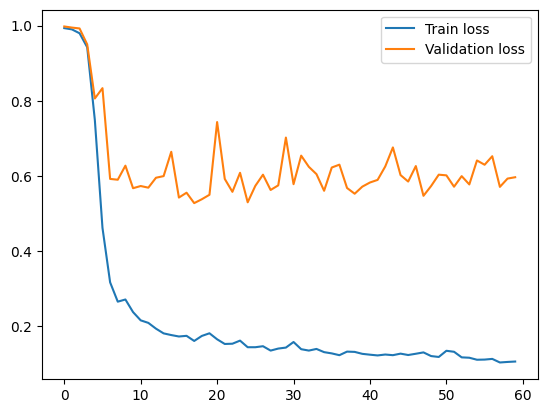

Best loss achieved on the validation set: 0.5271020178441648


In [28]:
model_lower_lr = UNet(depth=3)
model_lower_lr.to(device)
optimizer = torch.optim.Adam(model_lower_lr.parameters(), lr=0.0005)
_, best_loss = train_loop_with_validation(model_lower_lr, 60, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

In [19]:
train_val_concat_dataset = ConcatDataset([train_dataset, val_dataset])
train_val_concat_loader = DataLoader(train_val_concat_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

Epoch 1/50 started...
Training loss: 0.9903384757235767
...........................................
Epoch 2/50 started...
Training loss: 0.9648429077815234
...........................................
Epoch 3/50 started...
Training loss: 0.7377187328609994
...........................................
Epoch 4/50 started...
Training loss: 0.4474618929188426
...........................................
Epoch 5/50 started...
Training loss: 0.31364664120402763
...........................................
Epoch 6/50 started...
Training loss: 0.30452472262266206
...........................................
Epoch 7/50 started...
Training loss: 0.2734697296367428
...........................................
Epoch 8/50 started...
Training loss: 0.2531144696522534
...........................................
Epoch 9/50 started...
Training loss: 0.2384736499166101
...........................................
Epoch 10/50 started...
Training loss: 0.22640190958007564
........................................

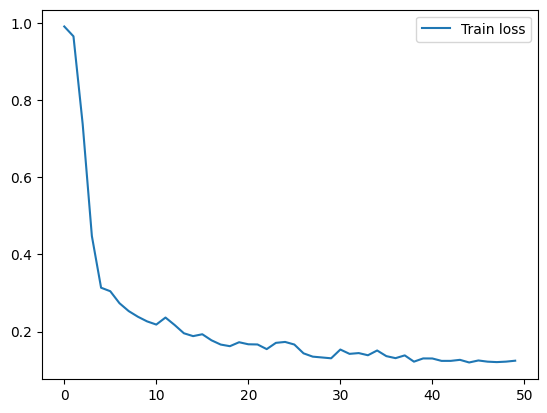

In [27]:
model_final = UNet(depth=3)
model_final.to(device)
optimizer = torch.optim.Adam(model_final.parameters(), lr=0.001)
best_model, best_loss = train_loop(model_final, 50, train_val_concat_loader, optimizer, criterion)

After retraining the best performing model on the combination of the training and validation dataset, it performed extremely bad in the evaluation on previously unseen CT scan slices from the test set, achieving a dice loss of a bit under 0.76.

The plots of ground truth masks and predicted segmentation masks are further displayed on a subset from the training set slices, and then on a subset from the test set slices.

What is interesting is that even the best models from the Medical Segmentation Decathlon challenge produce [poor results on the lung dataset](http://medicaldecathlon.com/results/), with the highest average dice coefficient achieved being 0.69. This could be due to the small size of the dataset (only 63 CT scans provided for training) and the extreme class imbalance, with most of the scan slices containing no or only small traces of tumors.

In [33]:
final_model_loss = evaluate(best_model, test_loader, criterion)
print(f'Final model loss: {final_model_loss}')

Final model loss: 0.7584493137755484


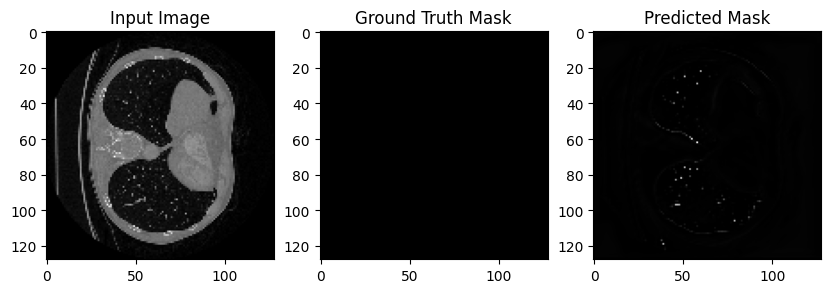

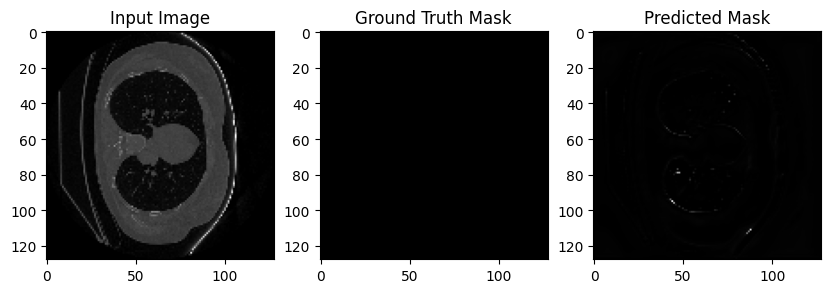

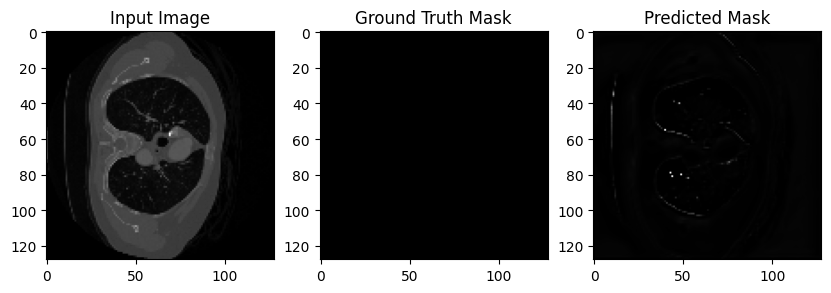

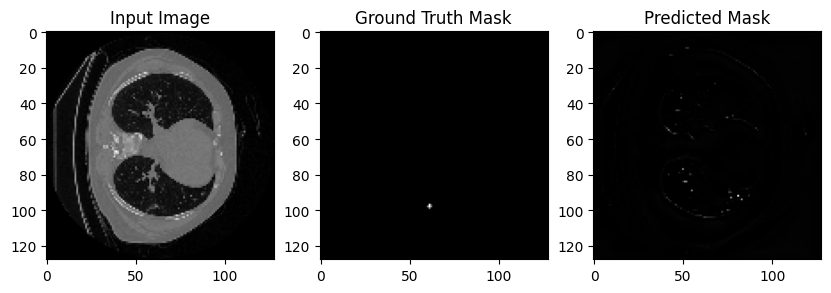

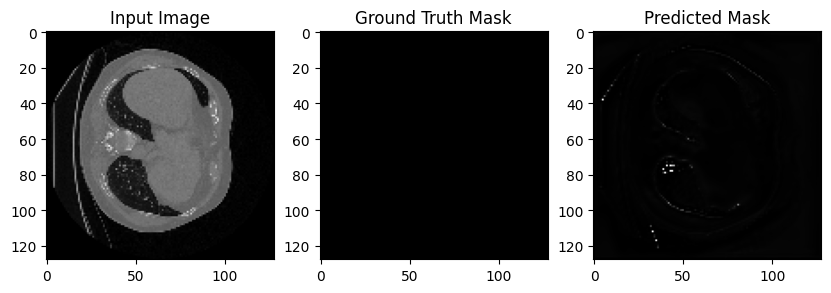

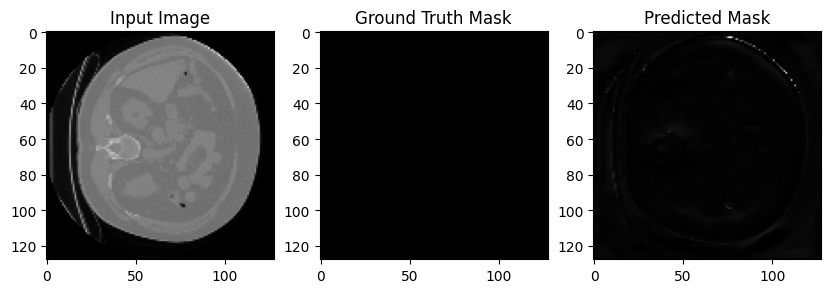

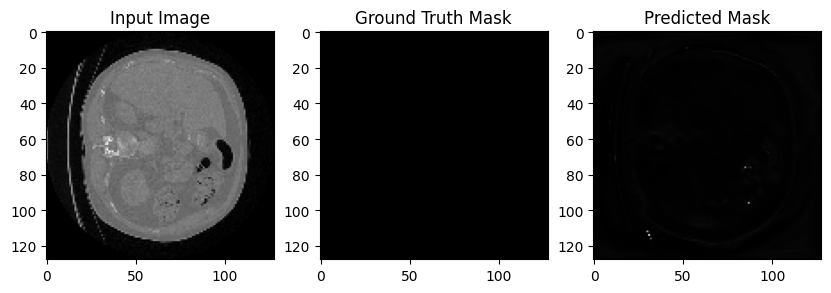

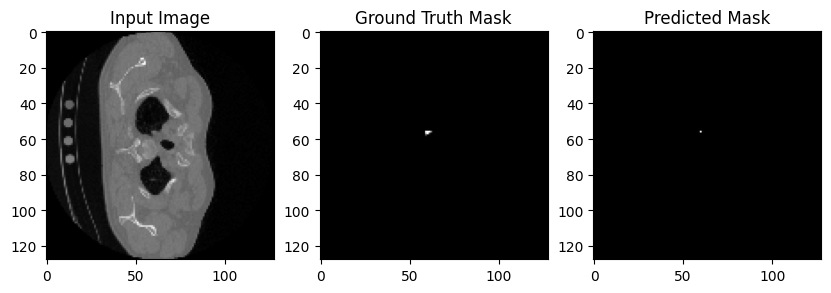

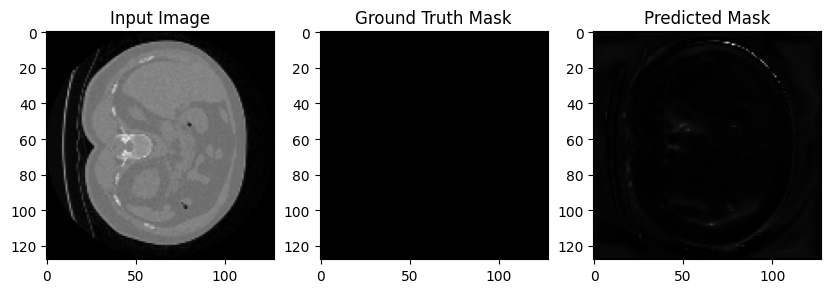

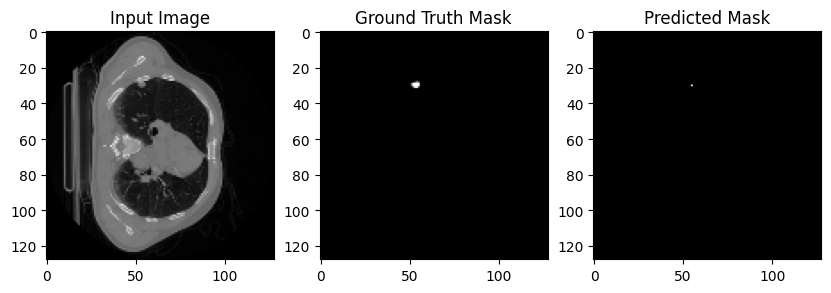

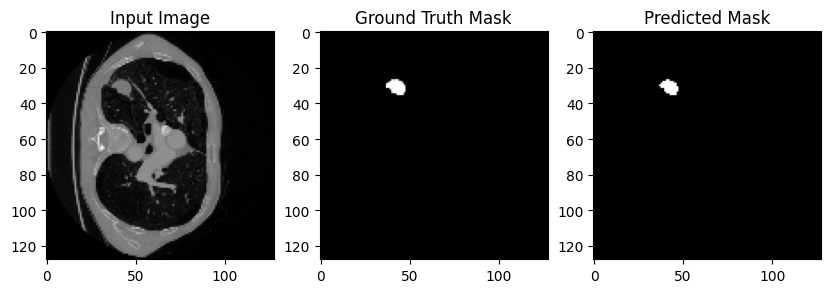

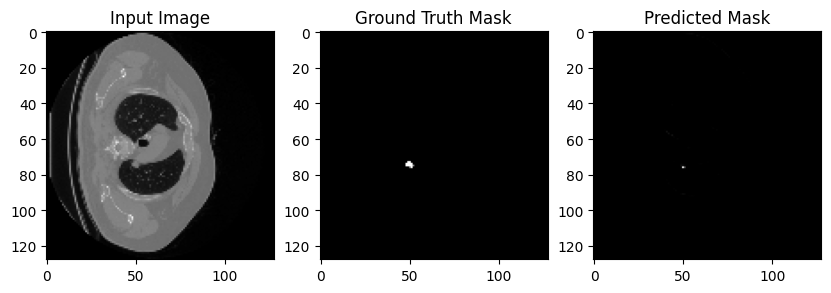

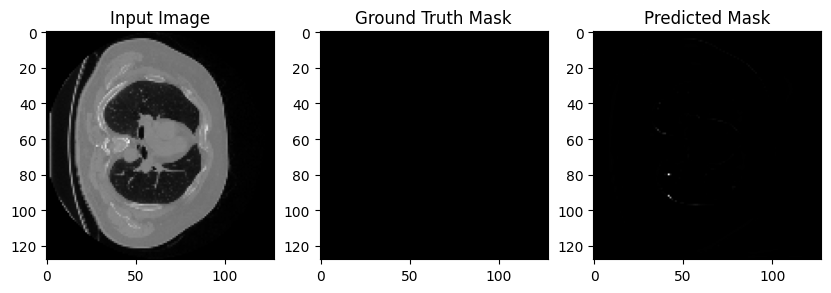

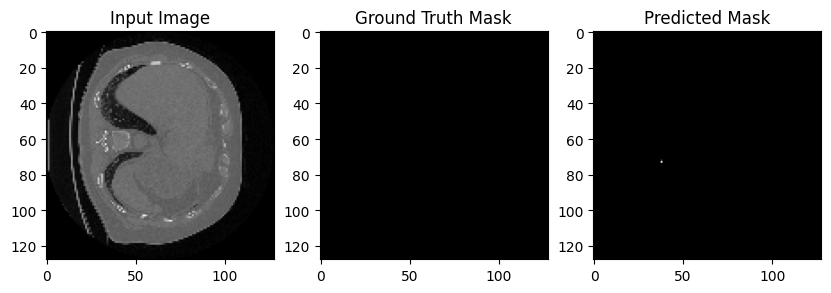

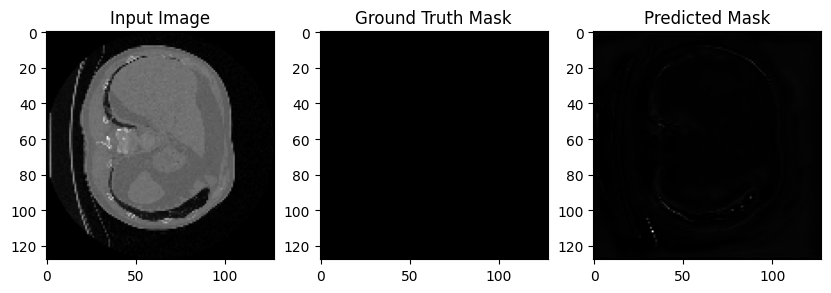

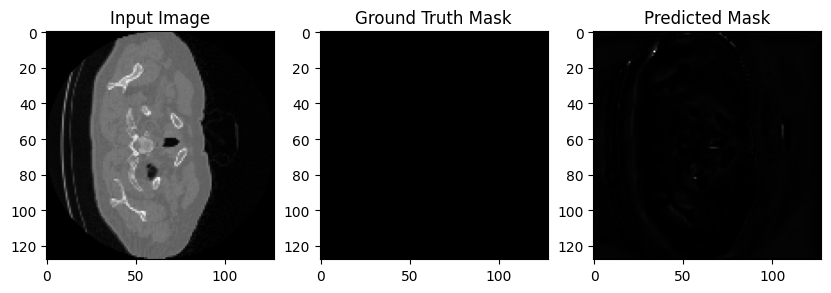

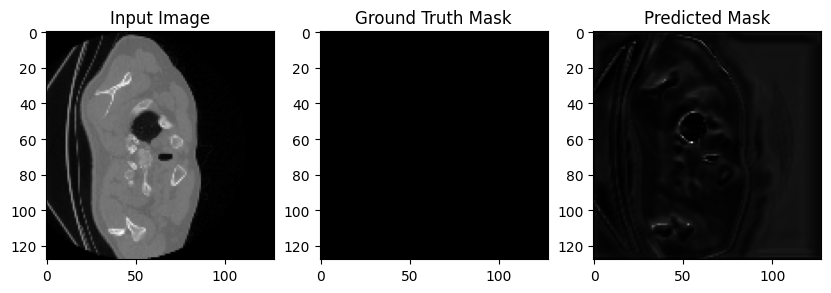

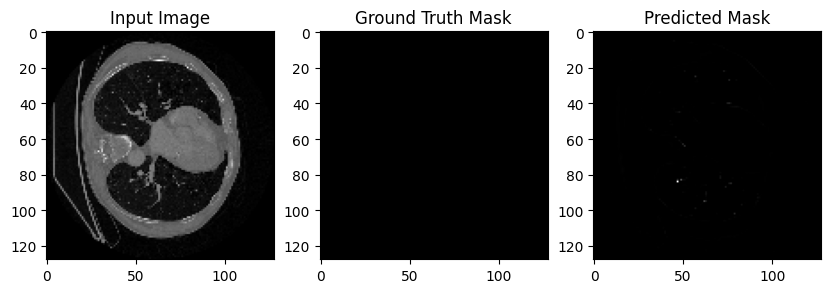

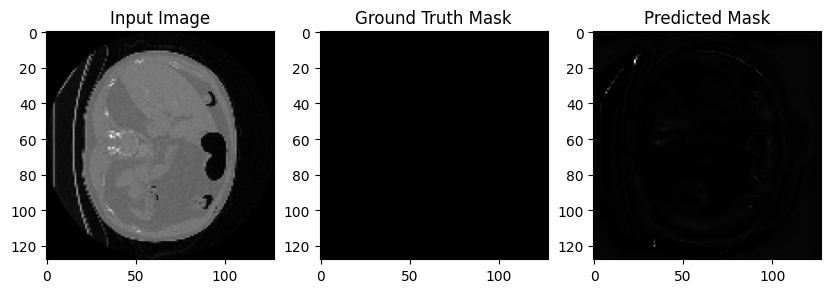

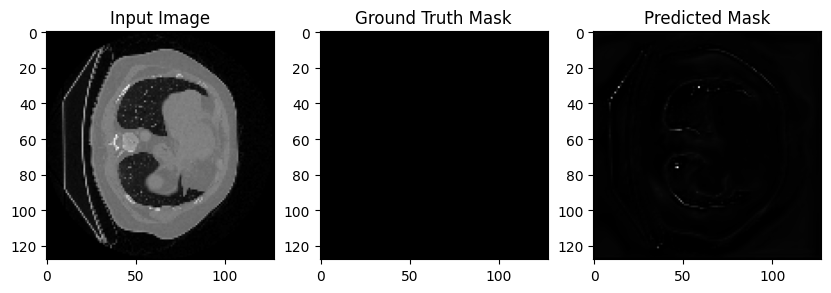

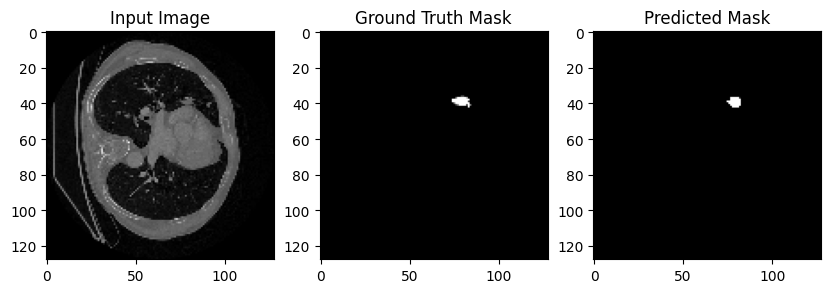

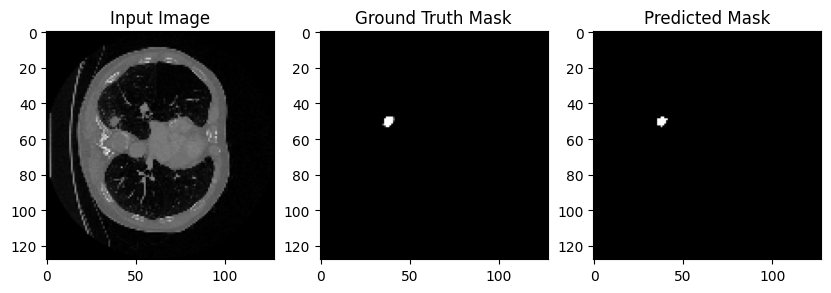

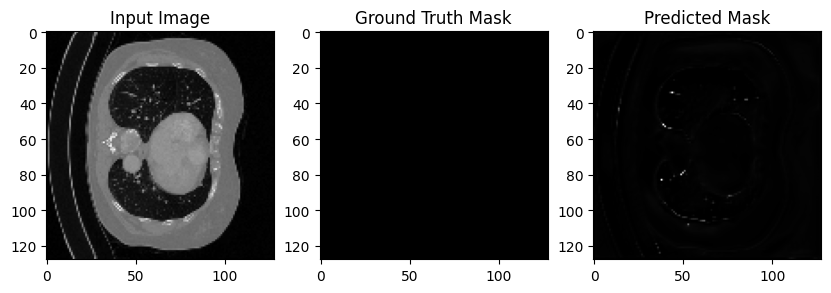

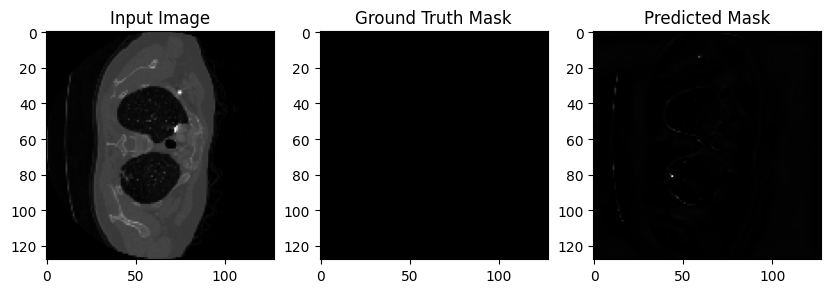

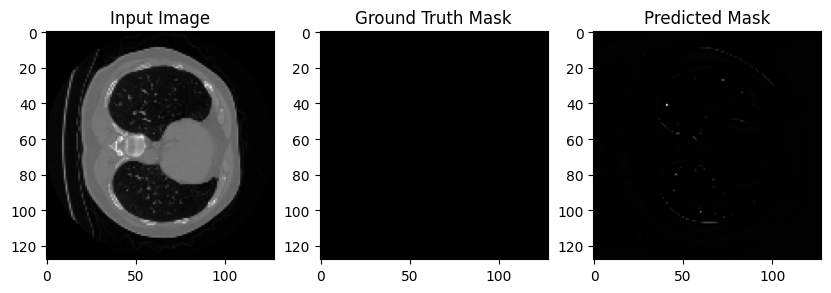

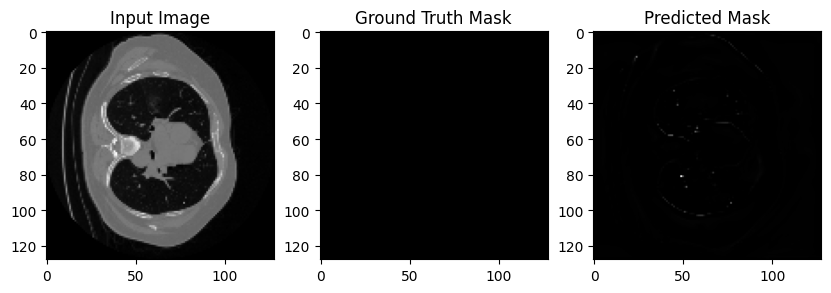

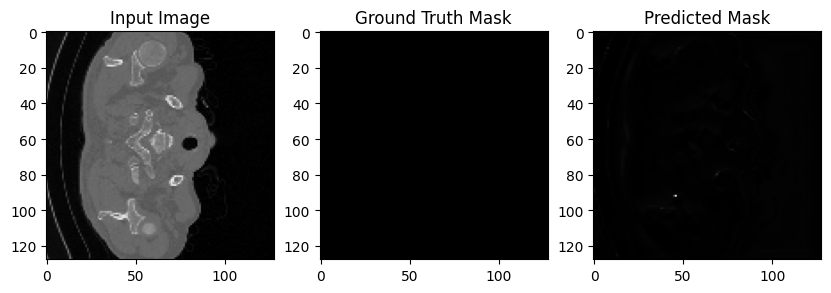

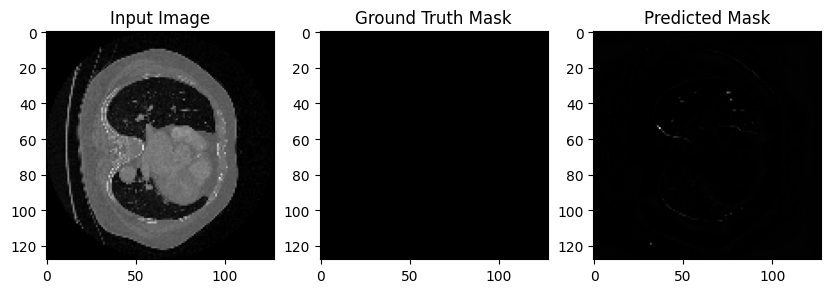

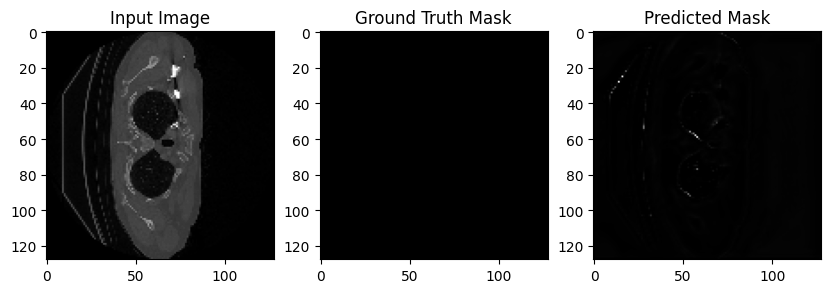

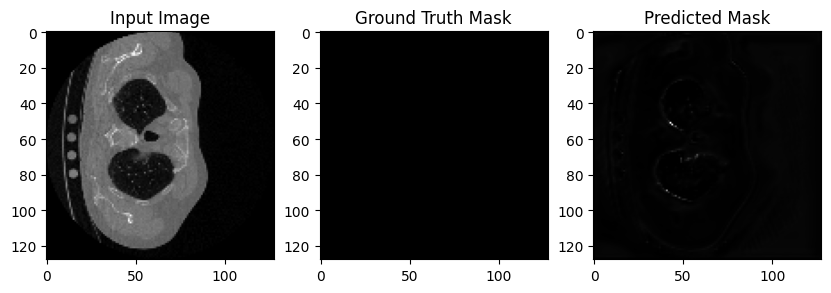

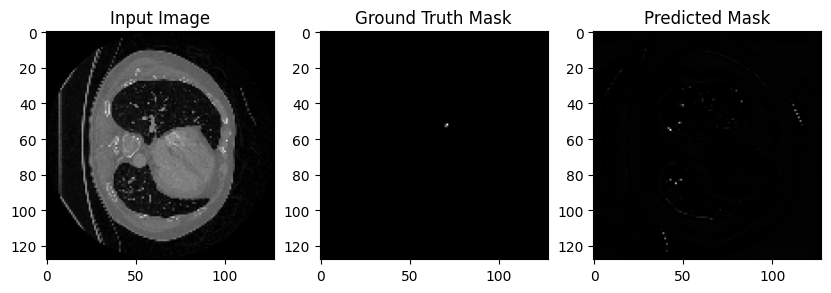

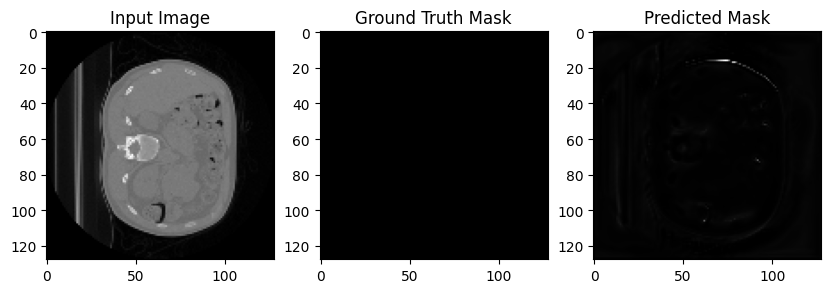

In [40]:
display_predictions(best_model, train_loader, device, 32)

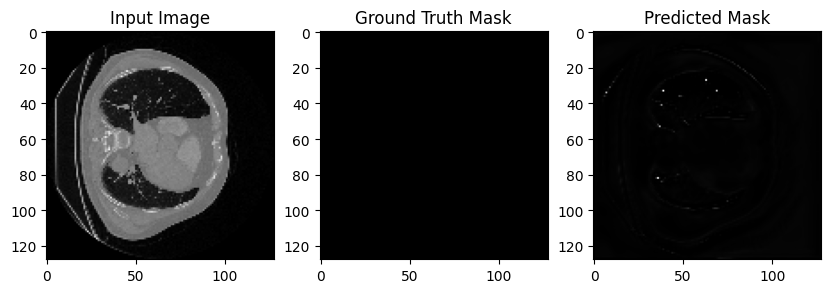

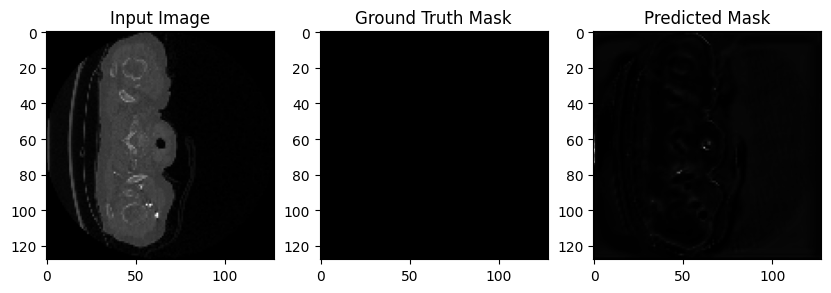

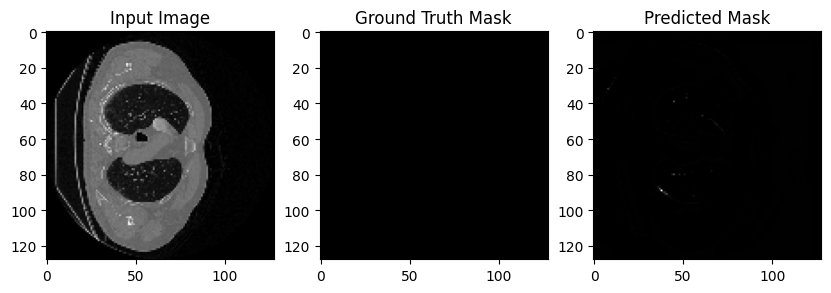

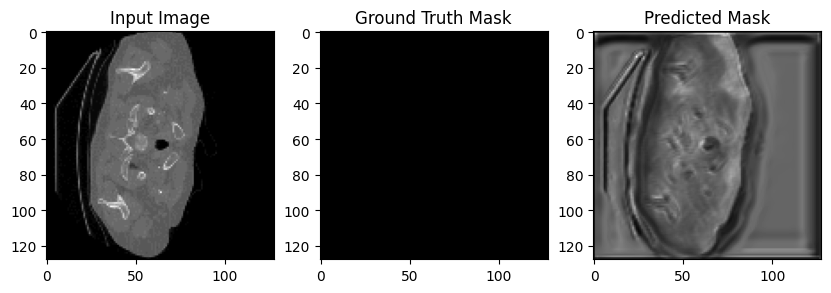

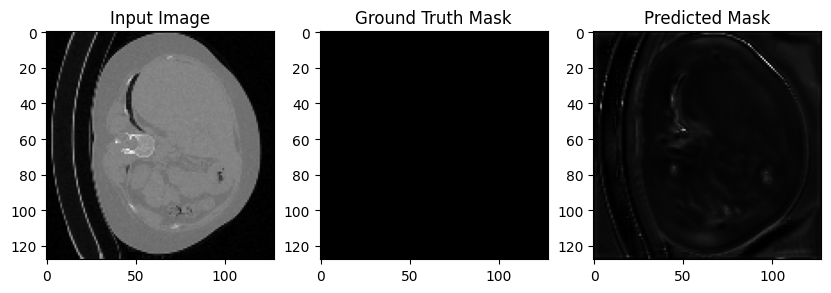

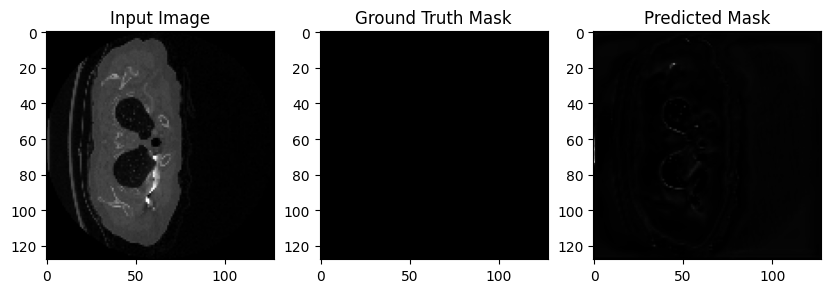

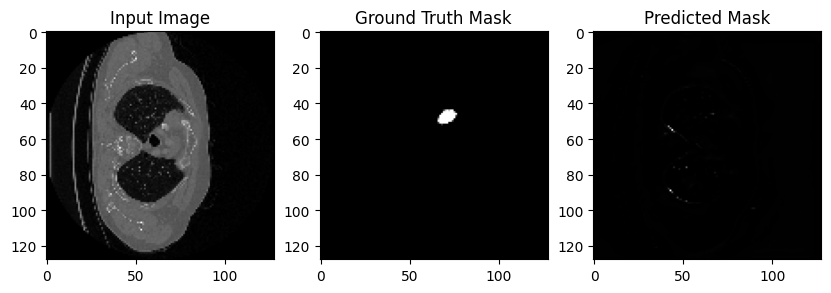

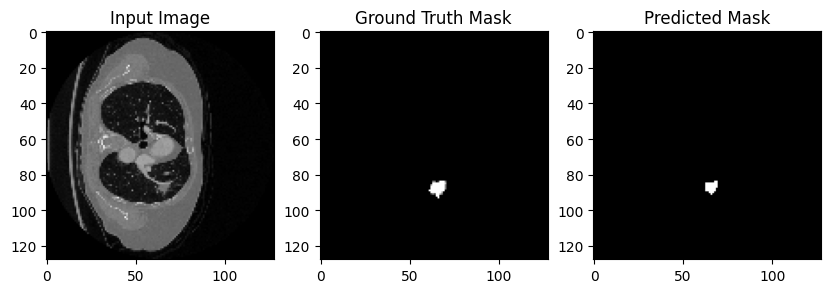

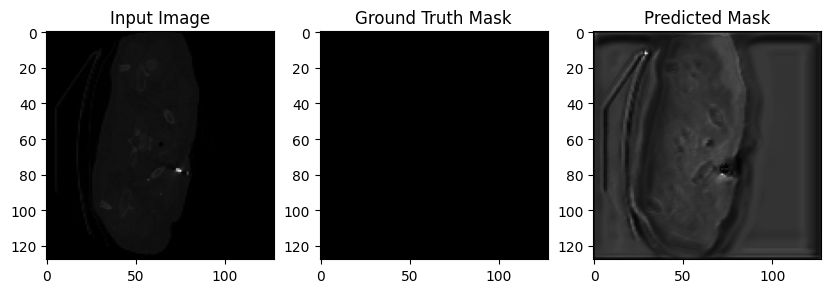

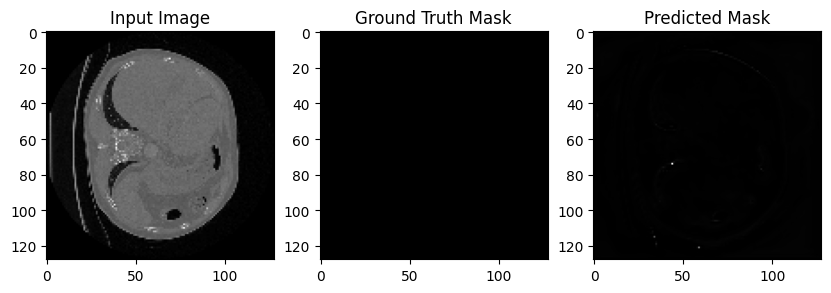

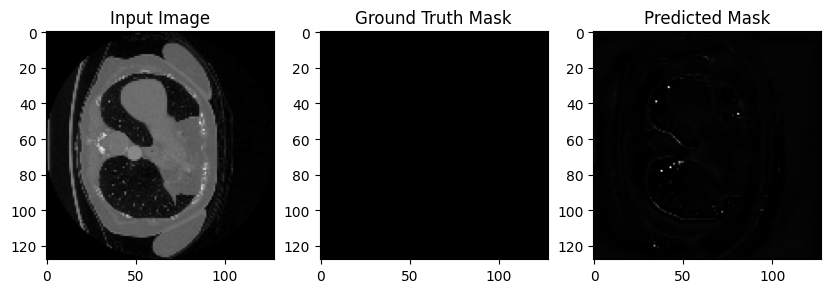

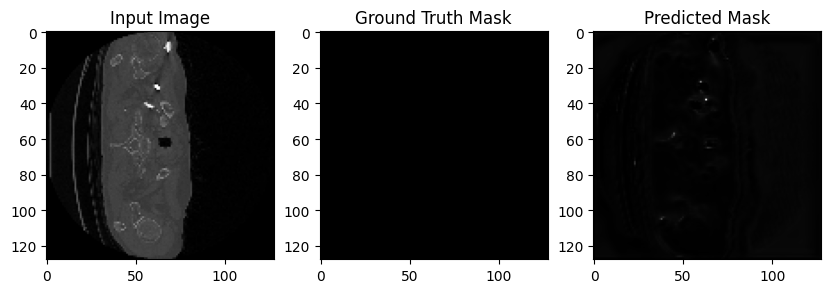

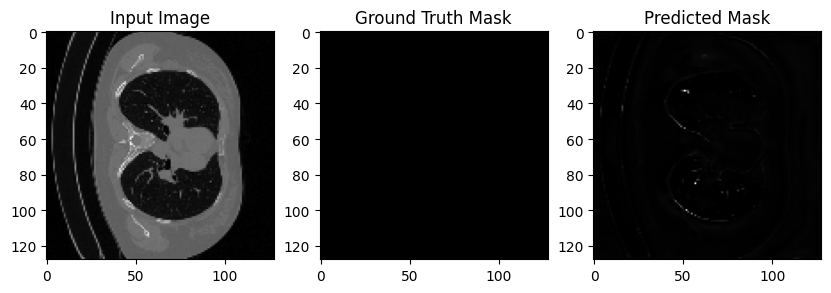

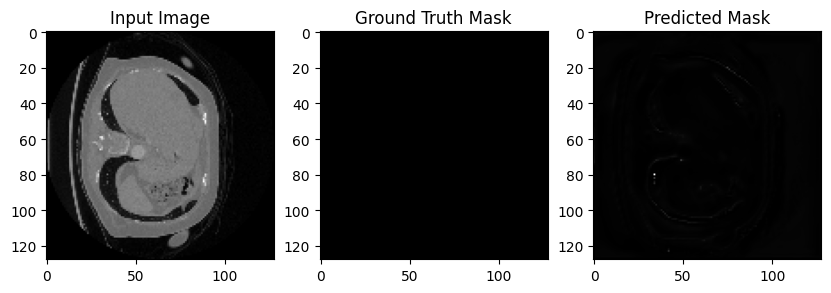

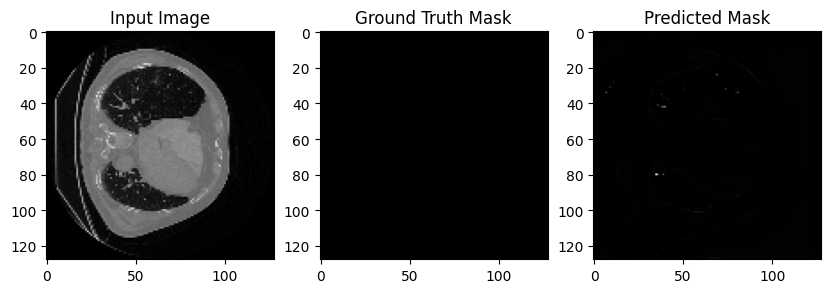

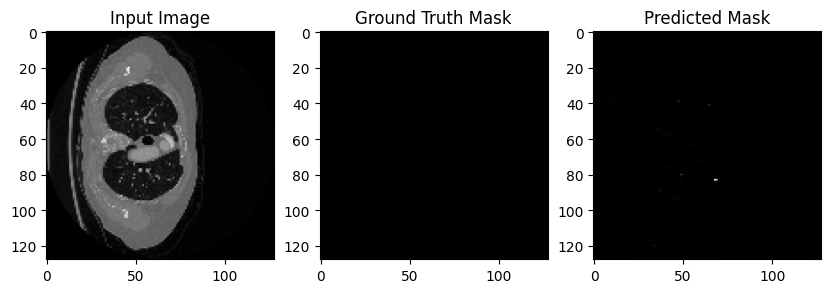

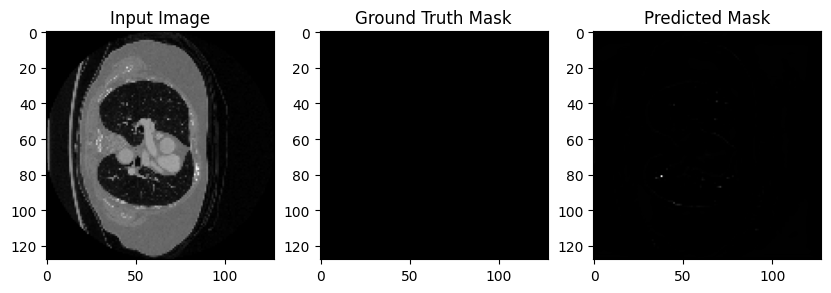

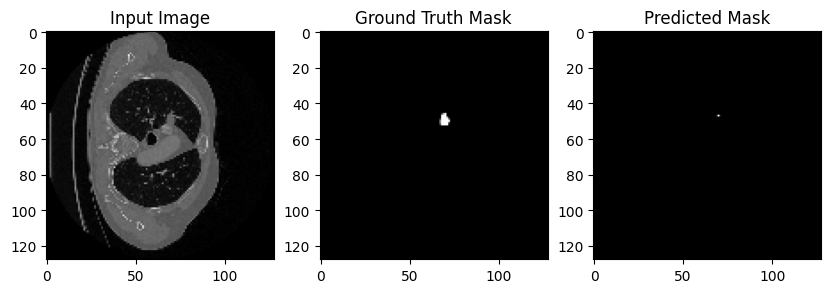

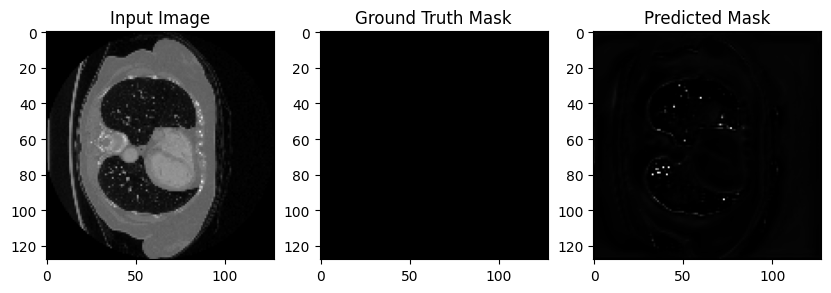

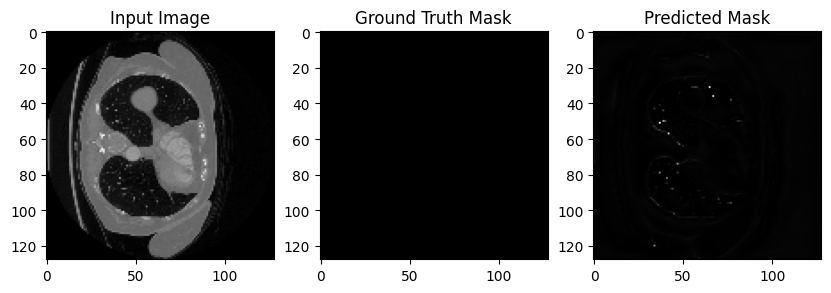

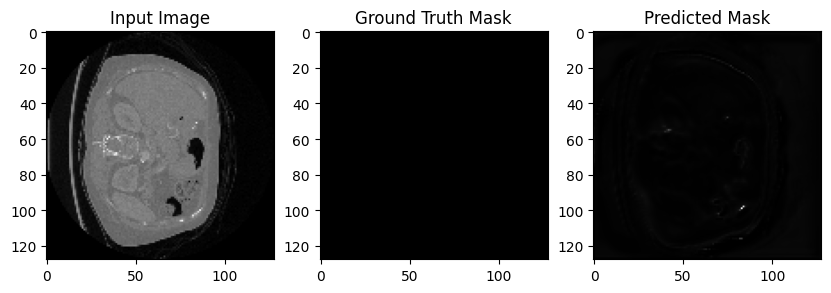

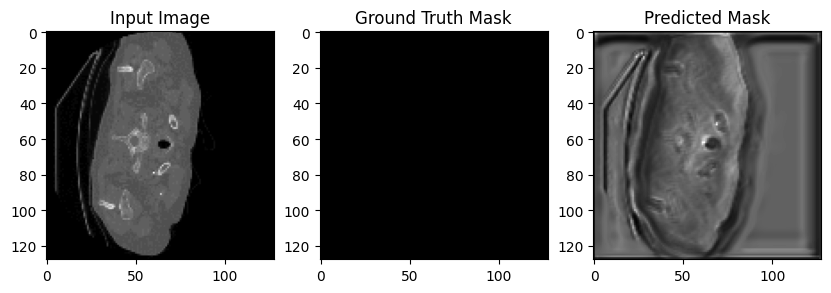

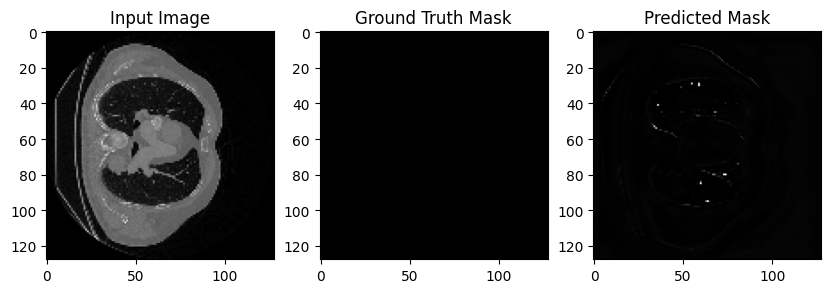

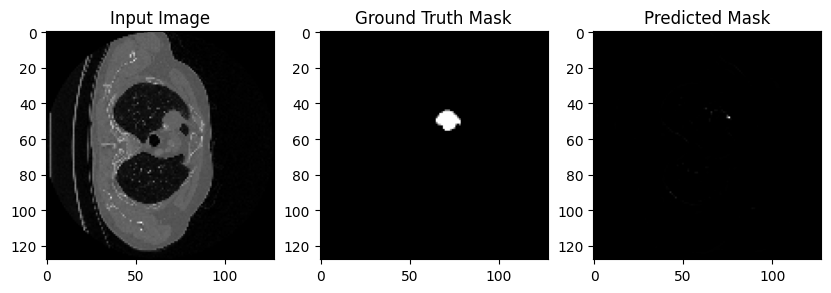

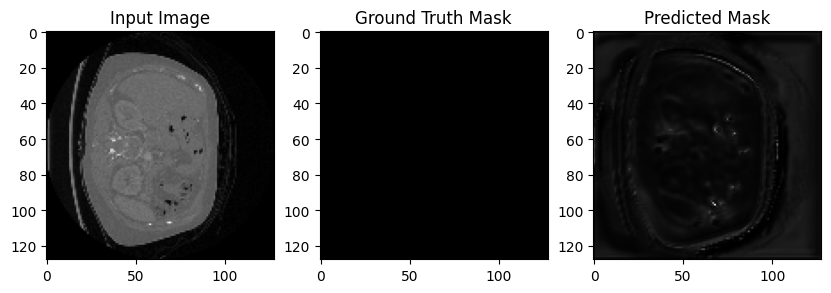

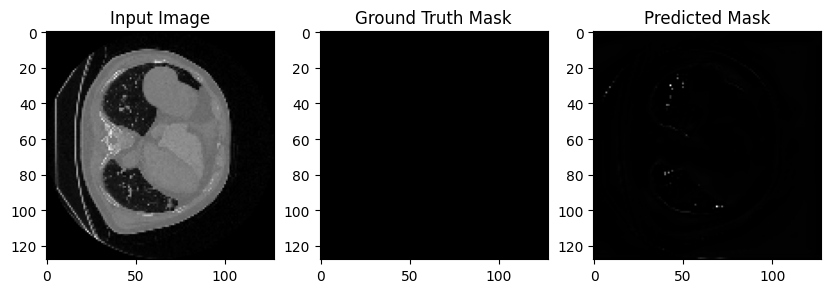

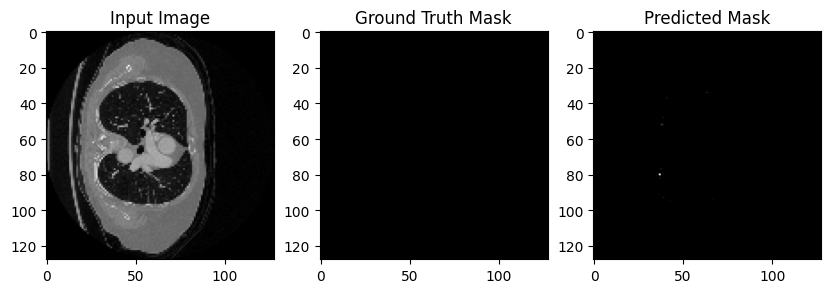

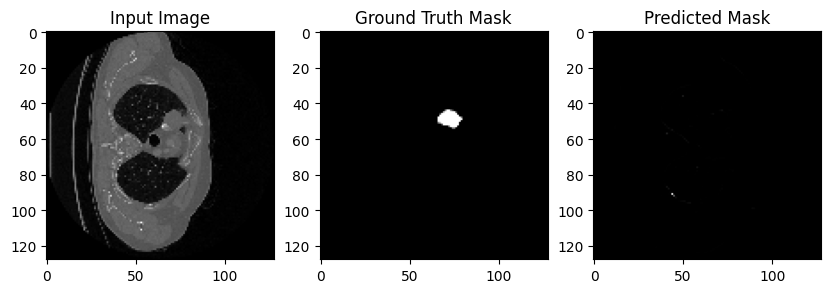

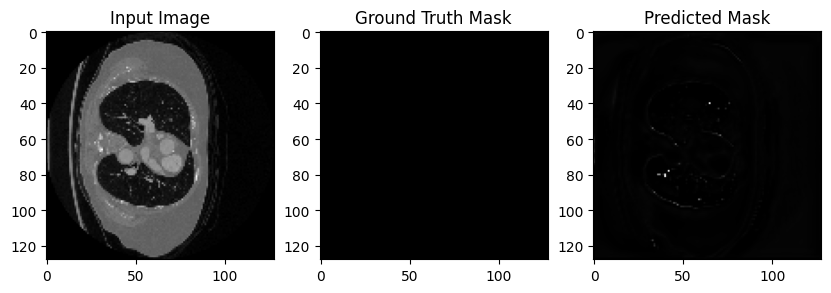

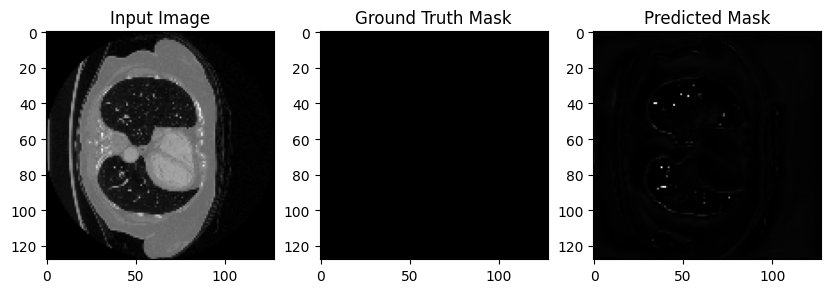

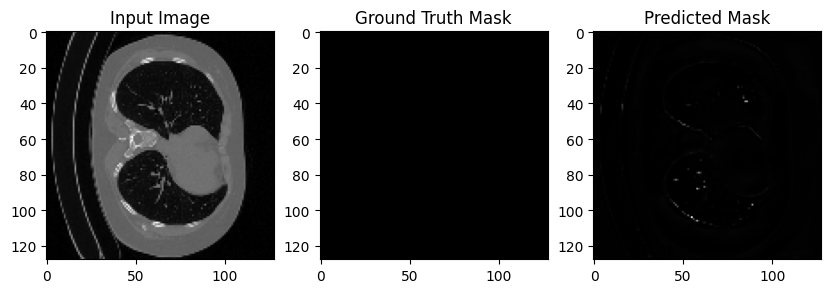

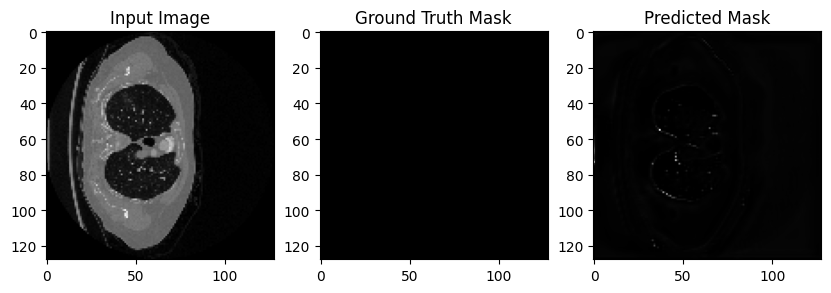

In [43]:
display_predictions(best_model, test_loader, device, 32)